> ### Note on Labs and Assigments:
>
> 🔧 Look for the **wrench emoji** 🔧 — it highlights where you're expected to take action!
>
> These sections are graded and are not optional.
>

# IS 4487 Lab 4: Data Understanding

## Outline

- Load and preview a real-world dataset
- Inspect structure and profile the data: data types, distributions, identify missing or unusual data such as outliers
- Deal with outliers
- Perform basic grouped summaries

<a href="https://colab.research.google.com/github/vandanara/UofUtah_IS4487/blob/main/Labs/lab_04_data_understanding.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

If you have any questions about Colab, you can read more here:  
https://research.google.com/colaboratory/faq.html


## Dataset Overview

This week we will use data on Bay Area Craigslist rental housing posts.

Source: Pennington, Kate (2018). Bay Area Craigslist Rental Housing Posts, 2000-2018. Retrieved from https://github.com/katepennington/historic_bay_area_craigslist_housing_posts/blob/master/clean_2000_2018.csv.zip

**Dataset:** `rent.csv`  
Source: [TidyTuesday – 2022-07-05](https://github.com/rfordatascience/tidytuesday/blob/main/data/2022/2022-07-05/rent.csv)

| Variable       | Type       | Description |
|----------------|------------|-------------|
| `post_id`      | Categorical| Unique listing ID |
| `date`         | Numeric    | Listing date (numeric format) |
| `year`         | Integer    | Year of listing |
| `nhood`        | Categorical| Neighborhood |
| `city`         | Categorical| City |
| `county`       | Categorical| County |
| `price`        | Numeric    | Listing price (USD) |
| `beds`         | Numeric    | Number of bedrooms |
| `baths`        | Numeric    | Number of bathrooms |
| `sqft`         | Numeric    | Square footage |
| `room_in_apt`  | Binary     |  Indicates whether the rental listing is for an entire apartment (0) or a single room within an apartment (1). |
| `address`      | Categorical| Street address |
| `lat`          | Numeric    | Latitude |
| `lon`          | Numeric    | Longitude |
| `title`        | Text       | Listing title |
| `descr`        | Text       | Listing description |
| `details`      | Text       | Additional details |


## Part 1: Importing the Libraries and Data

### Instructions:
- Import the `pandas`, `matplotlib` and `seaborn` libraries.
- Import data from the rent.csv into a dataframe from the tidytuesday link.
- Use `.info()` and `.head()` to inspect the structure and preview the data.

In [2]:
# import any libraries that you wish to use
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import data
# we can use a function in pandas called read_csv() to read in csv files.
# Similarly there are other functions such as  read_excel(), read_json(), read_html() etc
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2022/2022-07-05/rent.csv"
df = pd.read_csv(url)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200796 entries, 0 to 200795
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   post_id      200796 non-null  object 
 1   date         200796 non-null  int64  
 2   year         200796 non-null  int64  
 3   nhood        200796 non-null  object 
 4   city         200796 non-null  object 
 5   county       199402 non-null  object 
 6   price        200796 non-null  int64  
 7   beds         194188 non-null  float64
 8   baths        42675 non-null   float64
 9   sqft         64679 non-null   float64
 10  room_in_apt  200796 non-null  int64  
 11  address      3908 non-null    object 
 12  lat          7651 non-null    float64
 13  lon          4312 non-null    float64
 14  title        198279 non-null  object 
 15  descr        3254 non-null    object 
 16  details      8016 non-null    object 
dtypes: float64(5), int64(4), object(8)
memory usage: 26.0+ MB


In [11]:
df.head()

,post_id,date,year,nhood,city,county,price,beds,baths,sqft,room_in_apt,address,lat,lon,title,descr,details
0,pre2013_134138,20050111,2005,alameda,alameda,alameda,1250,2.0,2.0,NaN,0,NaN,NaN,NaN,$1250 / 2br - 2BR/2BA 1145 ALAMEDA DE LAS PU...,NaN,NaN
1,pre2013_135669,20050126,2005,alameda,alameda,alameda,1295,2.0,NaN,NaN,0,NaN,NaN,NaN,$1295 / 2br - Walk the Beach! 1 FREE MONTH + $...,NaN,NaN
2,pre2013_127127,20041017,2004,alameda,alameda,alameda,1100,2.0,NaN,NaN,0,NaN,NaN,NaN,$1100 / 2br - cottage,NaN,NaN
3,pre2013_68671,20120601,2012,alameda,alameda,alameda,1425,1.0,NaN,735.0,0,NaN,NaN,NaN,$1425 / 1br - 735ft² - BEST LOCATION SOUTHSHOR...,NaN,NaN
4,pre2013_127580,20041021,2004,alameda,alameda,alameda,890,1.0,NaN,NaN,0,NaN,NaN,NaN,"$890 / 1br - Classy ""Painted Lady"" VICTORIAN -...",NaN,NaN


### 🔧 Try It Yourself - Part 1

1. Add one line of code to print the number of rows and columns. To get the size of the table, use the .shape attribute of the Dataframe.

In [9]:
# Add code here 🔧
print(df.shape)

(200796, 17)


## Part 2: Inspecting/Profiling Data, Checking Datatypes & Identifying Outliers

### Instructions:
- Identify whether variables have missing values.
- Check data types (e.g., dates, numeric columns). These are inferred. Do they look appropriate?
- Check for outliers key numeric variables like `price`, `sqft`, `beds`, or `baths`. Outliers are extreme or unusally low or high values compared to most others.



In [8]:
# Check for missing values - get a count for each column
df.isnull().sum()

,0
post_id,0
date,0
year,0
nhood,0
city,0
county,1394
price,0
beds,6608
baths,158121
sqft,136117


In [ ]:
# Basic summary statistics
df[['price', 'beds', 'baths', 'sqft']].describe()

In [ ]:
# Check data types
df.dtypes

Data types are inferred.
- Numeric valus are either `int` (discrete, whole numbers with no limit) or `float` (continuous decimals with no limit). 64 is the default number of bits used to store the int or float.
- String/text is stored as `object`.
- Note that the inferred datatypes are not always ideal. For instance categorical is not used automatically. We have to set that. `categorical` is best when there are only a limited number of allowed values in the data. This can be numerical variables (0 or 1) or text variables with only some values to choose from (nhood, city, county)
- The date column is set as int, i.e. date is treated as integer. We will need to change this to `datetime` manually.


In [12]:
#change the following object and int variables to categorical
df['nhood']=df['nhood'].astype('category')
df['city']=df['city'].astype('category')
df['county']=df['county'].astype('category')

#change the date column to datetime
df['date']=pd.to_datetime(df['date'], errors = 'coerce')


In [13]:
#check dtypes again to verify changes
df.dtypes

,0
post_id,object
date,datetime64[ns]
year,int64
nhood,category
city,category
county,category
price,int64
beds,float64
baths,float64
sqft,float64


### Outlier analysis
To see whether a variable contains outlier (points that are very different in value from the rest), we can create a **boxplot** of the variable.

In a boxplot, the box covers the interquartile range (IQR) from 25-75 percentile of the data, and the whiskers (T lines) extend to a certain range (1.5 times the IQR) from the box. Any data points that fall outside of this whisker range are considered outliers and are plotted individually as points.

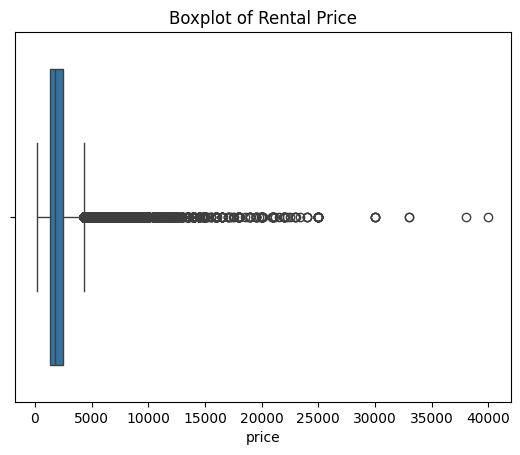

In [14]:
# Boxplot of price
sns.boxplot(x=df['price'])
plt.title("Boxplot of Rental Price")
plt.show()

In [15]:
# Remove price outliers (keep 1st–99th percentile)
q_low = df['price'].quantile(0.01)
q_high = df['price'].quantile(0.99)
df = df[(df['price'] >= q_low) & (df['price'] <= q_high)]

In [16]:
#check the shape to see how many rows were removed/lost when we dropped outliers in price
df.shape

(197021, 17)

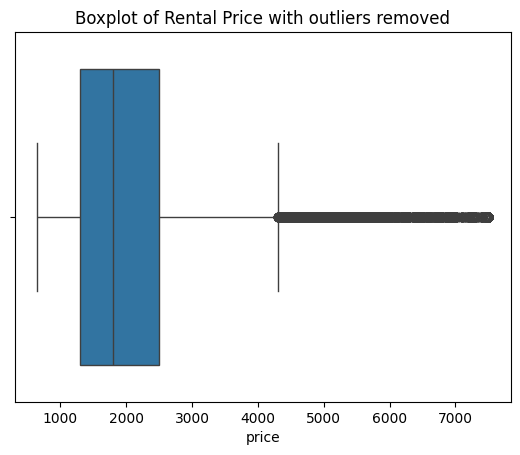

In [17]:
# the plot should have fewer outliers now - see for yourself
sns.boxplot(x=df['price'])
plt.title("Boxplot of Rental Price with outliers removed")
plt.show()

### 🔧 Try It Yourself – Part 2

1. Change the datatype of room_in_apt to categorical and print dtypes to verify that it has been changed.

2. Use `.describe()` and a boxplot to check for outliers in **square footage (`sqft`)**.

3. What patterns or issues do you see with square footage values? Is there anything unusual? You dont need to remove the outliers here - leave them.


/tmp/ipython-input-1559823880.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['room_in_apt']=df['room_in_apt'].astype('category')


post_id                object
date           datetime64[ns]
year                    int64
nhood                category
city                 category
county               category
price                   int64
beds                  float64
baths                 float64
sqft                  float64
room_in_apt          category
address                object
lat                   float64
lon                   float64
title                  object
descr                  object
details                object
dtype: object
count     63588.000000
mean       1174.754576
std        5033.363160
min          80.000000
25%         750.000000
50%        1000.000000
75%        1340.000000
max      900000.000000
Name: sqft, dtype: float64


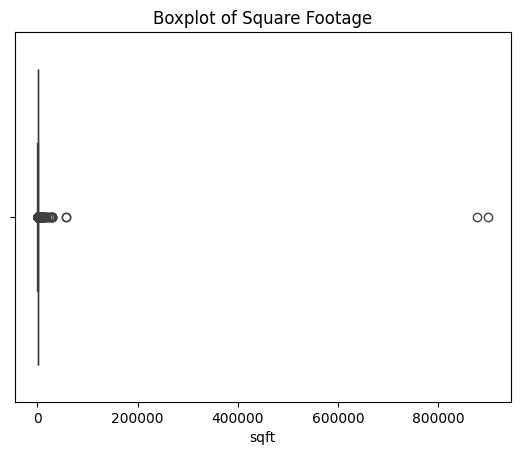

In [27]:
# Add code here 🔧
# Changing the datatype of room_in_apt to categorical and verifying that it was changed
df['room_in_apt']=df['room_in_apt'].astype('category')
print(df.dtypes)

# Create boxplot and check for outliers in sqft alongside .describe()
print(df['sqft'].describe())
sns.boxplot(x=df['sqft'])
plt.title("Boxplot of Square Footage")
plt.show()

# Answer to question: I see extreme outliers that are heavily distoring the data. In order to create
# a bettter boxplot, we need to remove the outliers, particularly the extremely high upper band of 90,000.


In [ ]:
# N/A. All my code fit into the previous cell.



🔧 Add comment here:


## Part 3: Basic Exploration

### Instructions:

- Use `groupby` and `value_counts` to summarize trends across neighborhoods and cities.


In [28]:
# Average price by neighborhood
df.groupby('nhood')['price'].mean().sort_values(ascending=False).head(10)

/tmp/ipython-input-2269547214.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('nhood')['price'].mean().sort_values(ascending=False).head(10)


,price
nhood,
inverness,5310.000000
tiburon / belvedere,3470.911197
SOMA / south beach,3450.726223
financial district,3431.484935
saratoga,3393.803279
west portal / forest hills,3302.753388
NOPA,3186.456667
pacific heights,3022.314860
candlestick point,3011.316239


In [29]:
# Top cities by count
df['city'].value_counts().head(10)

,count
city,
san francisco,54264
san jose,13564
oakland,9308
santa rosa,6163
santa cruz,5407
san mateo,5094
sunnyvale,4480
mountain view,4382
santa clara,4132


### 🔧 Try It Yourself – Part 3

Explore the data by performing both of the following:

1. Group the listings by `year` and calculate the average price for each year.
2. Use `.value_counts()` on the `room_in_apt` column to see how common room rentals are.

3. Add a short comment or markdown cell describing any trends or insights you found.


In [35]:
# Add code here 🔧
# Group listing by year and calc avg price each year
print(df.groupby('year')['price'].mean())
# See how common room rentals are
df['room_in_apt'].value_counts().head(10)

# Answer to question: First, we see that all price data (grouped by year) is of the floating point data type. We observe the trend that as year increases, so does the average price.
# Futher, when examining how common room rentals are, we see that the vast majority of room_in_apt values (196767) are 0, indicating no room, and only
# 254 are 1, indicating a truthy value and a room.

year
2000    1510.952381
2001    2009.739310
2002    1669.556738
2003    1573.383743
2004    1642.277840
2005    1506.983871
2006    1764.345831
2007    2033.602596
2008    2010.951895
2009    1882.756691
2010    1795.600296
2011    2021.713915
2012    2056.291743
2013    2492.213802
2014    2656.825700
2015    2844.753398
2016    2795.165914
2017    2884.878224
2018    2860.209527
Name: price, dtype: float64


,count
room_in_apt,
0,196767
1,254


🔧 Add comment here:


## Export Your Notebook to Submit in Canvas
- Use the instructions from Lab 1

In [37]:
!jupyter nbconvert --to html "lab_04_data_understanding.ipynb"

[NbConvertApp] Converting notebook lab_04_data_understanding.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 378412 bytes to lab_04_data_understanding.html
